# DSCI 552 Machine Learning For Data Science
    
## Small Examples

**Week 03 | Lecture 05**

_Tuesday, February 2, 2020_

Presented by Dr. Keith Burghardt

In [2]:
#import numpy
import numpy as np
import pandas
import sklearn.linear_model
import sklearn.metrics
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline



import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
x = np.array([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]).reshape(-1, 1)
y1 = [1,1,1,0,0,0,0,0,1,1,1]#8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [0,0,0,0,0,0,1,1,1,1,1]#[9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [1,1,0,1,0,0,1,0,1,0,1]#[7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [0,0,0,0,0,0,0,0,0,0,1]#[8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]

x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]).reshape(-1, 1)
y4 = [0,1,0,1,0,0,1,1,0,1,1]#[6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

NameError: name 'sorted_x' is not defined

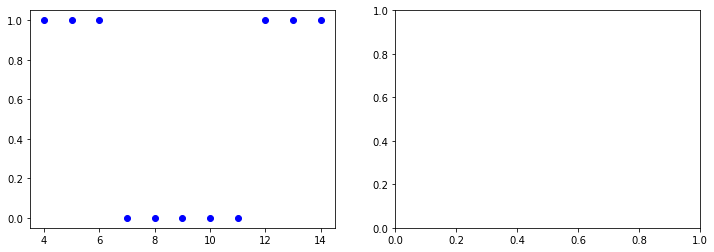

In [4]:
# Generate Dataset
reg1 = sklearn.linear_model.LogisticRegression()
reg1.fit(x, y1)
reg2 = sklearn.linear_model.LogisticRegression()
reg2.fit(x, y2)

# Plot

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(x, y1, 'bo'); axes[0].plot(sorted_x, reg1.predict_proba(x)[:,1], 'b-');
axes[1].plot(x, y2, 'go'); axes[1].plot(sorted_x, reg2.predict_proba(x)[:,1], 'g-'); plt.show()

In [ ]:
# Generate Dataset
reg3 = sklearn.linear_model.LogisticRegression()
reg3.fit(x, y3)
reg4 = sklearn.linear_model.LogisticRegression()
reg4.fit(x4, y4)

# Plot
sorted_x4 = np.sort(x4.flatten()).reshape(-1, 1)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(x, y3, 'ro'); axes[0].plot(sorted_x, reg3.predict_proba(x)[:,1], 'r-');
axes[1].plot(x4, y4, 'ko'); axes[1].plot(sorted_x, reg4.predict_proba(sorted_x4)[:,1], 'k-'); plt.show()

In [ ]:
print(reg3.coef_.flatten()) #B1 in the slides
print(reg3.intercept_) #B0 in the slides

In [ ]:

acc = sklearn.metrics.accuracy_score

y1_pred = reg1.predict(x)
y2_pred = reg2.predict(x)
y3_pred = reg3.predict(x)
y4_pred = reg4.predict(x4)
acc(y1_pred, y1), acc(y2_pred, y2), acc(y3_pred, y3), acc(y4_pred, y4)

In [ ]:
f1 = sklearn.metrics.f1_score


f1(y1_pred, y1), f1(y2_pred, y2), f1(y3_pred, y3), f1(y4_pred, y4)

In [ ]:
from sklearn import metrics
roc = metrics.roc_curve
auc = metrics.auc
y1_prob=reg1.predict_proba(x)[:,1]
y2_prob=reg2.predict_proba(x)[:,1]
y3_prob=reg3.predict_proba(x)[:,1]
y4_prob=reg4.predict_proba(x)[:,1]

fpr1, tpr1, thresholds1 = metrics.roc_curve(y1, y1_prob, pos_label=1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y2, y2_prob, pos_label=1)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y3, y3_prob, pos_label=1)
fpr4, tpr4, thresholds3 = metrics.roc_curve(y4, y4_prob, pos_label=1)


fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plt.plot([0,1],[0,1],'k--',label='random')
plt.plot(fpr1, tpr1,'b-',label='data1')
plt.plot(fpr2, tpr2,'g-',label='data2')
plt.plot(fpr3, tpr3,'r-',label='data3')
plt.plot(fpr4, tpr4,'k-',label='data4')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax.set_aspect('equal')
plt.legend()
plt.show()
plt.close()

print('data1 ROC-AUC: ',auc(fpr1, tpr1))
print('data2 ROC-AUC: ',auc(fpr2, tpr2))
print('data3 ROC-AUC: ',auc(fpr3, tpr3))
print('data4 ROC-AUC: ',auc(fpr4, tpr4))

### Numeric Solution

In [ ]:



h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(35, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        y_pred=clf.predict(X_test)
        scores = [acc(y_pred,y_test),f1(y_pred,y_test)]

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('Acc:%.2f' % scores[0]).lstrip('0'),
                size=15, horizontalalignment='right')
        ax.text(xx.min()+1.4, yy.min() + .3, ('F1:%.2f' % scores[1]).lstrip('0'),
                size=15, horizontalalignment='right')
        #ax.text(xx.min(), yy.min() + .3, ('%.2f' % scores[2]).lstrip('0'),
        #        size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
# We can also develop our own data and examples!
# Questions to think about
# - Are models robust (for new data, will performance be similar?)
# - What model performs best?
#    - F1, Accuracy, AUC
#    - What models are expected to work well on a variety of data?
#    - When will models break down?
# - What data is noisy? 
# - What is the best metric?
#    - What is your definition of best?
#    - E.g., robust (dependence on data)
#    - Are high values always reflective of a good model?
#    - When does each metric break down?